# Checking Starting Commandas

In [0]:
import numpy as np

In [0]:
import pandas as pd

#Import Dog-Bread-Identification. Zip and extract to train and test data

In [0]:
#!unzip "drive/My Drive/Kaggle-Dog-Vision/dog-breed-identification.zip" -d "drive/My Drive/Kaggle-Dog-Vision/"

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%ls

drive/  sample_data/


In [0]:
%ls drive/'My Drive'


 2020/                      'List of Publications'/   Resumes/
 Applications/               MPhil/                   Tickets/
 Books/                      M.Sc./                   Videos/
'Colab Notebooks'/           Ph.D./                  'Web developer.docx'
 Documents/                  Photos/                 'Web developer.gdoc'
 dog-breed-identification/   PPTs/
 Kaggle-Dog-Vision/          Publications/


In [0]:
%ls -al "drive/My Drive/Kaggle-Dog-Vision"

total 732613
-rw------- 1 root root 724495926 May  3 04:26 dog-breed-identification.zip
drwx------ 2 root root      4096 May  5 22:02 .ipynb_checkpoints/
-rw------- 1 root root    482063 Dec 11 20:54 labels.csv
drwx------ 2 root root      4096 May  5 22:02 logs/
-rw------- 1 root root  25200295 Dec 11 20:54 sample_submission.csv
drwx------ 2 root root      4096 May  3 20:43 test/
drwx------ 2 root root      4096 May  3 20:44 train/


In [0]:
%ls "drive/My Drive/Kaggle-Dog-Vision/test" | wc -l

^C


## Import TensorFlow

In [0]:
import tensorflow as tf

print("Tensorflow Version ", tf.__version__)

Tensorflow Version  2.2.0-rc4


In [0]:
import tensorflow_hub as hub

In [0]:
# check GPU availablity

print("GPU available, Yes " if tf.config.list_physical_devices("GPU") else "Not availabel" )

GPU available, Yes 


## Getting Our Data  Ready (Turning into Tensors)
### Turning all our data into tensors i.e. into numeric form. Turn all our images into tensors (numeric form)

In [0]:
### Check The labels
import pandas as pd
label_csv=pd.read_csv("drive/My Drive/Kaggle-Dog-Vision/labels.csv")
print(label_csv.describe())
print(label_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     6d2fe8f0bb9bbc3232567cd6d930a1e4  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [0]:
label_csv.breed.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
golden_retriever         67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

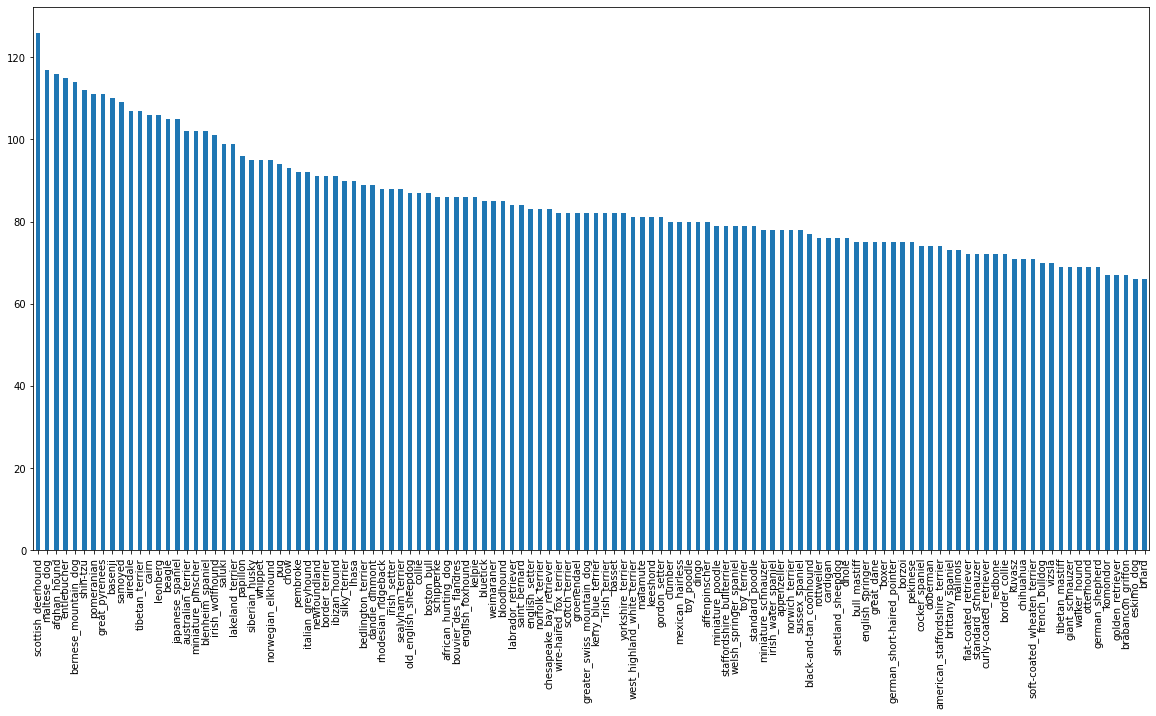

In [0]:
label_csv.breed.value_counts().plot(kind="bar", figsize=(20,10))

In [0]:
label_csv.breed.value_counts().median()

82.0

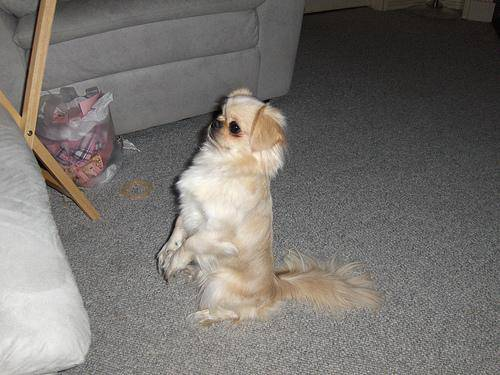

In [0]:
from IPython.display import Image, display
Image("drive/My Drive/Kaggle-Dog-Vision/train/001cdf01b096e06d78e9e5112d419397.jpg")

## Different Files in Our Data
### train.zip - the training set, you are provided the breed for these dogs
### test.zip - the test set, you must predict the probability of each breed for each image
### sample_submission.csv - a sample submission file in the correct format
### labels.csv - the breeds for the images in the train set

In [0]:
## save files in a file

filenames=[fname for fname in label_csv["id"]]
filenames[:10]

['000bec180eb18c7604dcecc8fe0dba07',
 '001513dfcb2ffafc82cccf4d8bbaba97',
 '001cdf01b096e06d78e9e5112d419397',
 '00214f311d5d2247d5dfe4fe24b2303d',
 '0021f9ceb3235effd7fcde7f7538ed62',
 '002211c81b498ef88e1b40b9abf84e1d',
 '00290d3e1fdd27226ba27a8ce248ce85',
 '002a283a315af96eaea0e28e7163b21b',
 '003df8b8a8b05244b1d920bb6cf451f9',
 '0042188c895a2f14ef64a918ed9c7b64']

In [0]:
## create pathnames for files in train images

filenames=["drive/My Drive/Kaggle-Dog-Vision/train/" + fname + ".jpg" for fname in label_csv["id"]]
filenames[:10]

['drive/My Drive/Kaggle-Dog-Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Kaggle-Dog-Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Kaggle-Dog-Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Kaggle-Dog-Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Kaggle-Dog-Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Kaggle-Dog-Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Kaggle-Dog-Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Kaggle-Dog-Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Kaggle-Dog-Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Kaggle-Dog-Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [0]:
print(len(filenames))

10222


In [0]:
import os
if len(filenames)==len(os.listdir("drive/My Drive/Kaggle-Dog-Vision/train/")):
  print ("The length in both files are same")
else:
  print ("Length is not same")

The length in both files are same


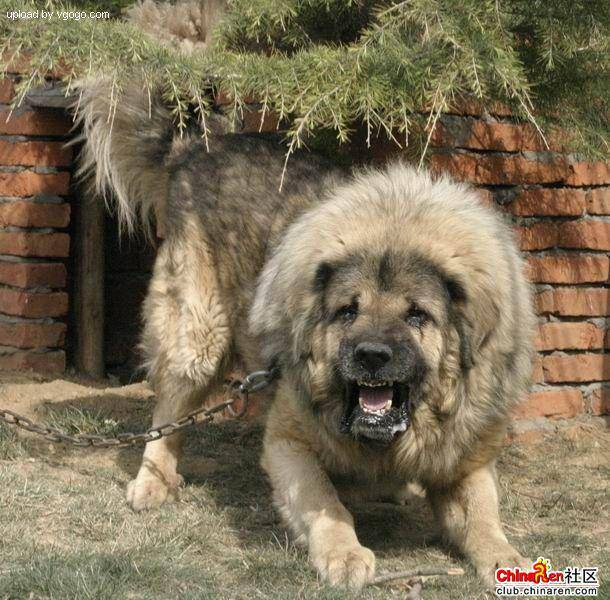

In [0]:
Image(filenames[9000])

In [0]:
label_csv["breed"][9000]

'tibetan_mastiff'

In [0]:
label_csv["id"][9000]

'e20e32bf114141e20a1af854ca4d0ecc'

In [0]:
import numpy as np
labels=label_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [0]:
len(labels)

10222

In [0]:
if len(labels)==len(filenames):
  print("Length is same")
else:
  print("Lenght different")

Length is same


In [0]:
unique_breeds=np.unique(labels)

In [0]:
len(unique_breeds)

120

In [0]:
unique_breeds[0]

'affenpinscher'

In [0]:
labels[0]==unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [0]:
boolean_labels=[unique_breeds==label  for label in labels]

In [0]:
len(boolean_labels)

10222

In [0]:
## We have converted our labels into boolean types to use in the numeric format

boolean_labels[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [0]:
boolean_labels[0].astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
print(labels[0])
print(np.where(unique_breeds==labels[0]))
print(boolean_labels[0].astype(int))
print(boolean_labels[0])


boston_bull
(array([19]),)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
[False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False Fals

In [0]:
## Setup X and y

x=filenames
y=boolean_labels

len(x), len(y)

(10222, 10222)

In [0]:
NUM_IMAGES=1000 #@param{type:"slider", min:1000, max:5000,step:1000}

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train,y_val=train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2, random_state=44)

In [0]:
len(x_train), len(x_val)

(800, 200)

In [0]:
x_train[:2], y_train[:2]

(['drive/My Drive/Kaggle-Dog-Vision/train/0140b05bfc2fd43f2819fab3d8566109.jpg',
  'drive/My Drive/Kaggle-Dog-Vision/train/0b6da522f27c115716285a4f7187969e.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, F

## Preprocessing Images(Turning images into tensors)
   ### 1)Take the File path as input
   ### 2) Use the tensorflow to read the image and save into a variable 'image'
   ### 3) Transfer the variable 'image' (.jpg) into a tensor
   ### 4) Resize the 'image' to a a shape (244,244)
   ### 5) Retirn the modified 'image'

 ##### First Check the Image- how it look like

In [0]:
from matplotlib.pyplot import imread
image=imread(filenames[44])
image.shape

(333, 500, 3)

In [0]:
image

array([[[ 79,  81,  60],
        [ 87,  88,  70],
        [ 98,  99,  81],
        ...,
        [221, 219, 222],
        [217, 215, 218],
        [216, 214, 217]],

       [[ 83,  84,  66],
        [ 89,  90,  72],
        [ 98,  99,  81],
        ...,
        [220, 218, 221],
        [216, 214, 217],
        [214, 212, 215]],

       [[ 89,  90,  72],
        [ 93,  94,  76],
        [100, 101,  85],
        ...,
        [218, 216, 219],
        [214, 212, 215],
        [213, 211, 214]],

       ...,

       [[210, 212, 198],
        [166, 168, 154],
        [101, 103,  90],
        ...,
        [197, 195, 200],
        [192, 190, 195],
        [192, 190, 195]],

       [[181, 184, 165],
        [189, 192, 173],
        [159, 161, 147],
        ...,
        [199, 197, 200],
        [192, 190, 193],
        [195, 193, 196]],

       [[172, 176, 153],
        [192, 195, 174],
        [184, 187, 168],
        ...,
        [192, 190, 193],
        [183, 181, 184],
        [189, 187, 190]]

In [0]:
image[:2]

array([[[ 79,  81,  60],
        [ 87,  88,  70],
        [ 98,  99,  81],
        ...,
        [221, 219, 222],
        [217, 215, 218],
        [216, 214, 217]],

       [[ 83,  84,  66],
        [ 89,  90,  72],
        [ 98,  99,  81],
        ...,
        [220, 218, 221],
        [216, 214, 217],
        [214, 212, 215]]], dtype=uint8)

In [0]:
## Turn image into tensor
tensor=tf.constant(image)
tensor[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[ 79,  81,  60],
        [ 87,  88,  70],
        [ 98,  99,  81],
        ...,
        [221, 219, 222],
        [217, 215, 218],
        [216, 214, 217]],

       [[ 83,  84,  66],
        [ 89,  90,  72],
        [ 98,  99,  81],
        ...,
        [220, 218, 221],
        [216, 214, 217],
        [214, 212, 215]]], dtype=uint8)>

In [0]:
## Function for our purpose

IMG_SIZE=224

def process_image(image_path, img_size=IMG_SIZE):
   ## read the image 
  image=tf.io.read_file(image_path)
  ## turn the image into numerical form
  image=tf.image.decode_jpeg(image,channels=3)
  ## Turn color channels values from 0-255 to 0-1 (normalization-make computing efficient)
  image=tf.image.convert_image_dtype(image, tf.float32)
  ## resize the image to (224,224)
  image=tf.image.resize(image, size=[img_size, img_size])

  return image

Turning our Data into batches -to fit the data into memory (RAM)

In [0]:
# 1) To use tenserflow effectively turn the data into tuples of form (image, label)

def get_image_label(image_path, label):
  image=process_image(image_path, IMG_SIZE)
  return image, label

In [0]:
# 2) Turn the data into Batches
BATCH_SIZE=32

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating batches of test data...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch=data.map(process_image).batch(BATCH_SIZE) ## convert our data into n(BATCH_SIZE) batches
    return data_batch
  elif valid_data:
    print("Creating Batches of valid data...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    data_batch=data.map(get_image_label).batch(batch_size)
    return data_batch
  else:
    print("Creating Batches of train data....")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    data=data.shuffle(buffer_size=len(x))
    data_batch=data.map(get_image_label).batch(batch_size)
    return data_batch

In [0]:
# 3) Creating training and valid data

train_data=create_data_batches(x_train, y_train)
val_data=create_data_batches(x_val,y_val, valid_data=True)

Creating Batches of train data....
Creating Batches of valid data...


In [0]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [0]:
# 4) Visualization Function 
import matplotlib.pyplot as plt
def show_images(images, label):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[label[i].argmax()])
    plt.axis("off")

In [0]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
# 5) Make the data displayable- converting from batches to images and labels
 train_images,train_labels=next(train_data.as_numpy_iterator())
 len(train_images), len(train_labels)

(32, 32)

In [0]:
`show_images(train_images, train_labels) ### when 36 instead of 25

SyntaxError: ignored

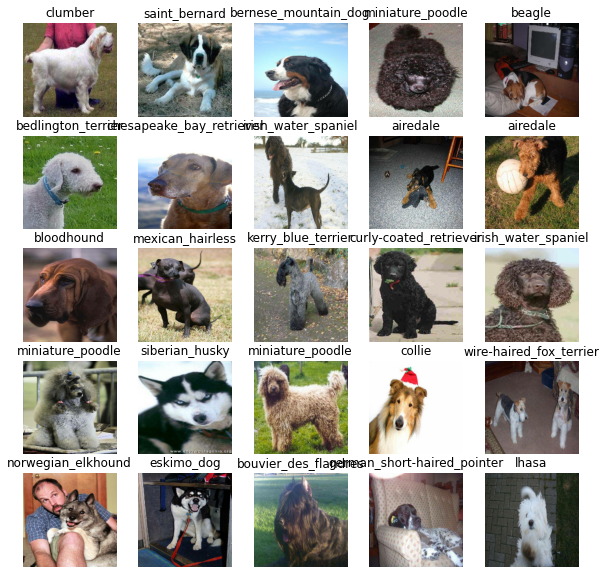

In [0]:
show_images(train_images, train_labels)

In [0]:
val_images, val_labels=next(val_data.as_numpy_iterator())


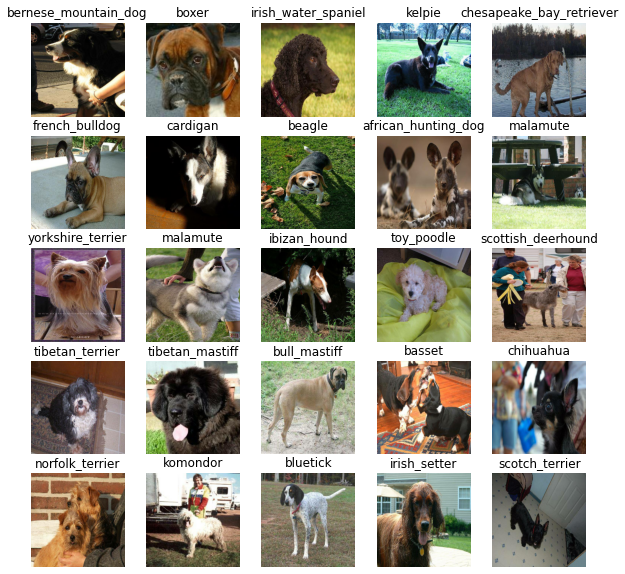

In [0]:
show_images(val_images, val_labels)

## Building the Model
   ### 1) Define the input shape and Output shape
   ### 2) Define the Model

In [0]:
## 1) Define the input and output shape of the Model

INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3] ## batch_size, height, width, channels
OUTPUT_SHAPE=len(unique_breeds)

In [0]:
## 2) Define the model-Model URL

MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

### Create a function in which:
* takes input shape, output shape and model url
* Define the layers in keras model in sequential fashion
* Compile the model
* Build the model
* Return the Model

In [0]:
## Create a function which build a keras model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building the model with :", model_url)
  ## Setup model layers

  model=tf.keras.Sequential([
                             hub.KerasLayer(model_url), ## Layer 1(input layer)
                             tf.keras.layers.Dense(units=output_shape, activation="softmax") ## Layer 2 -output layer
                             ]) 
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )
  model.build(input_shape)
  return model


In [0]:
model=create_model()
model.summary()

Building the model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Creating a Callbacks
callbacks are functions which monitor the progress, save the progress, stop training the model at early stage if model stops improving

In [0]:
## 1) Monitor the progress of the model----TensorBoard()
## 2) Early stop the training if the model traing takes too long--EarlyStopping() 

In [0]:
%load_ext tensorboard

In [0]:
import datetime


def create_tensorboard_callback():
  logdir=os.path.join("drive/My Drive/Kaggle-Dog-Vision/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

### Training the model
* First tain only 1000 images to make sure the model is working fine

In [0]:
NUM_EPOCHS=100 #@param{type:"slider", min:10,max:100, step:10}

In [0]:
## Check the GPU Availability once again

print("GPU is abailabe" if tf.config.list_physical_devices("GPU") else "Not Available")

GPU is abailabe


In [0]:
## Creating the Function to train model data

def train_model():
  ## 1) create model
  model=create_model()

  ## Create tensorboard callback

  tensorboard=create_tensorboard_callback()

  ## Fit the model by passing it the callbacks

  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, 
            callbacks=[tensorboard, early_stopping])
  
  return model

In [0]:
model=train_model()

Building the model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 762s 30s/step - loss: 4.5781 - accuracy: 0.1063 - val_loss: 3.3004 - val_accuracy: 0.3050
Epoch 2/100
25/25 [==============================] - 6s 233ms/step - loss: 1.6850 - accuracy: 0.6662 - val_loss: 1.9643 - val_accuracy: 0.5400
Epoch 3/100
25/25 [==============================] - 6s 229ms/step - loss: 0.5953 - accuracy: 0.9350 - val_loss: 1.5070 - val_accuracy: 0.6300
Epoch 4/100
25/25 [==============================] - 6s 221ms/step - loss: 0.2558 - accuracy: 0.9862 - val_loss: 1.3311 - val_accuracy: 0.6950
Epoch 5/100
25/25 [==============================] - 6s 228ms/step - loss: 0.1481 - accuracy: 0.9987 - val_loss: 1.2502 - val_accuracy: 0.6850
Epoch 6/100
25/25 [==============================] - 6s 223ms/step - loss: 0.1028 - accuracy: 1.0000 - val_loss: 1.2004 - val_accuracy: 0.7050
Epoch 7/100
25/25 [=========================

In [0]:
## 25 for trian becaue 800/32=25 and 7 for validation data because 200/32=6.25

In [0]:
## Checking the tensorboard logs

%tensorboard --logdir drive/My\ Drive/Kaggle-Dog-Vision/logs

Output hidden; open in https://colab.research.google.com to view.

In [0]:
perdictions=model.predict(val_data, verbose=1)

7/7 [==============================] - 1s 133ms/step


In [0]:
perdictions

array([[3.1904652e-04, 2.8376055e-05, 2.1039024e-05, ..., 7.0034504e-05,
        2.1644725e-04, 3.5363206e-04],
       [1.0917850e-03, 4.4810784e-04, 1.4270380e-05, ..., 1.9621334e-04,
        4.0214852e-04, 2.5536679e-04],
       [4.3971950e-04, 8.1442040e-04, 1.1172935e-04, ..., 1.8473429e-03,
        9.8125951e-05, 7.1198934e-05],
       ...,
       [1.8317510e-04, 2.0304467e-06, 3.6325215e-05, ..., 2.2910845e-04,
        1.5076550e-05, 2.2900448e-04],
       [1.7741120e-05, 7.7323847e-07, 1.3393277e-04, ..., 9.4005583e-05,
        2.5561139e-06, 3.5640312e-04],
       [7.2058372e-04, 2.5633842e-04, 1.9855145e-04, ..., 7.4380354e-05,
        5.7517154e-05, 1.0176528e-03]], dtype=float32)

In [0]:
perdictions.shape

(200, 120)

In [0]:
val_data.shape

AttributeError: ignored

In [0]:
len(y_val)

200

In [0]:
perdictions[44]

array([1.98651198e-03, 1.93281309e-03, 1.57560586e-04, 4.12486435e-04,
       1.40574458e-03, 4.29102947e-04, 3.41883046e-04, 2.18705341e-01,
       1.38233521e-03, 7.97442510e-04, 4.86103399e-03, 1.06555117e-05,
       2.67881970e-03, 4.26700353e-07, 2.63938215e-03, 6.73842951e-05,
       2.13659205e-03, 3.40142986e-04, 7.89339840e-03, 4.61865362e-04,
       1.60252632e-04, 1.11369975e-01, 3.44525877e-04, 3.67033324e-04,
       4.38945543e-04, 3.19684128e-04, 1.09810918e-03, 1.22309336e-02,
       2.27288567e-02, 2.33945344e-03, 4.58094431e-03, 1.23660534e-03,
       1.38698024e-05, 2.13134638e-03, 1.05463827e-04, 2.29030338e-05,
       1.38204268e-04, 8.03836528e-03, 4.15253676e-02, 4.15996066e-04,
       1.62155728e-03, 1.65151607e-04, 1.16658525e-03, 4.14367057e-02,
       7.80138420e-04, 3.02970438e-04, 4.04646125e-05, 4.96969114e-05,
       1.08808708e-04, 1.96785922e-03, 5.91442995e-06, 4.01035920e-02,
       8.15987494e-03, 9.02750326e-05, 1.08540896e-03, 1.72411290e-03,
      

In [0]:
perdictions.max()

0.98907566

In [0]:
index=4
print(f"Max probability :", np.max(perdictions[index]))
print(f"Index with Max probaility :", np.argmax(perdictions[index]))
print(f" Dog breed name :", unique_breeds[np.argmax(perdictions[index])])

Max probability : 0.7618544
Index with Max probaility : 28
 Dog breed name : chesapeake_bay_retriever


In [0]:
## Get prediction Probability into labels
index=48
def get_pred_label(prediction_probabilities):
   return unique_breeds[np.argmax(prediction_probabilities)]

pred_labels=get_pred_label(perdictions[index])
pred_labels

'walker_hound'

### Unbatch Function

In [0]:
def unbatchify(data):
  images_=[]
  labels_=[]

  for image, label in data.unbatch().as_numpy_iterator():
      images_.append(image)
      labels_.append(unique_breeds[np.argmax(label)])
  return images_, labels_

val_images, val_labels=unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.38253656, 0.33005056, 0.39671725],
         [0.39007288, 0.33761382, 0.4041996 ],
         [0.3882505 , 0.33652484, 0.4009104 ],
         ...,
         [0.6425558 , 0.5580867 , 0.42135274],
         [0.64060557, 0.5465585 , 0.37419435],
         [0.6989901 , 0.5822008 , 0.400487  ]],
 
        [[0.23527732, 0.22053643, 0.26486418],
         [0.26317158, 0.24654026, 0.29140618],
         [0.30117124, 0.274853  , 0.3158876 ],
         ...,
         [0.591317  , 0.5246922 , 0.388734  ],
         [0.60727173, 0.52386594, 0.3482765 ],
         [0.6351768 , 0.53510714, 0.34835058]],
 
        [[0.24187677, 0.2657213 , 0.31404063],
         [0.24192405, 0.26956236, 0.3097672 ],
         [0.24611345, 0.26242998, 0.30113798],
         ...,
         [0.47172153, 0.4274753 , 0.30893174],
         [0.6263348 , 0.568551  , 0.40058115],
         [0.591305  , 0.51581454, 0.33219227]],
 
        ...,
 
        [[0.7795137 , 0.6720558 , 0.494955  ],
         [0.73814404, 0.6306861 , 0.45358

## Plot Prediction Probabilities

In [0]:
def plot_pred(prediction_probabilities, images, labels, n=1):
  pred_prob=prediction_probabilities[n]
  image=images[n]
  true_label=labels[n]
  pred_label=get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  
  if pred_label==true_label:
     color="green"
  else:
     color="red"

  plt.title("Predicted Breed: {} \nTrue Breed: {} \n Probability: {:0.2f}% ".format(pred_label, true_label,np.max(pred_prob)*100), color=color)


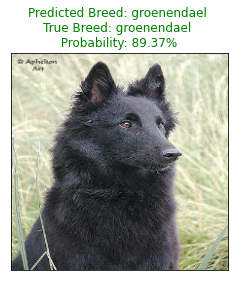

In [0]:
plot_pred(perdictions, images=val_images, labels=val_labels, n=47)

In [0]:
## Function to show models top predictions

def plot_pred_conf(prediction_probabilities,labels,n=1):
  pred_prob=prediction_probabilities[n]
  true_label=labels[n]

  pred_label=get_pred_label(pred_prob)

  top_10_pred_index=pred_prob.argsort()[-10:][::-1]
  
  top_10_pred_values=pred_prob[top_10_pred_index]

  top_10_pred_labels=unique_breeds[top_10_pred_index]

  top_plot=plt.bar(np.arange(len(top_10_pred_index)), top_10_pred_values,color="gray")

  plt.xticks(np.arange(len(top_10_pred_labels)),labels=top_10_pred_labels,rotation="vertical")

  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")
  else:
    pass
    




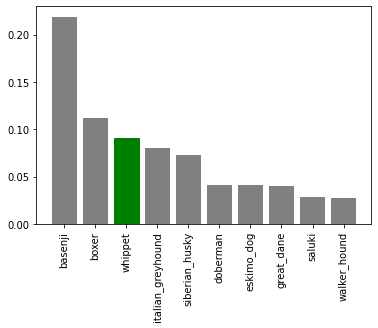

In [0]:
plot_pred_conf(prediction_probabilities=perdictions, labels=val_labels, n=44)

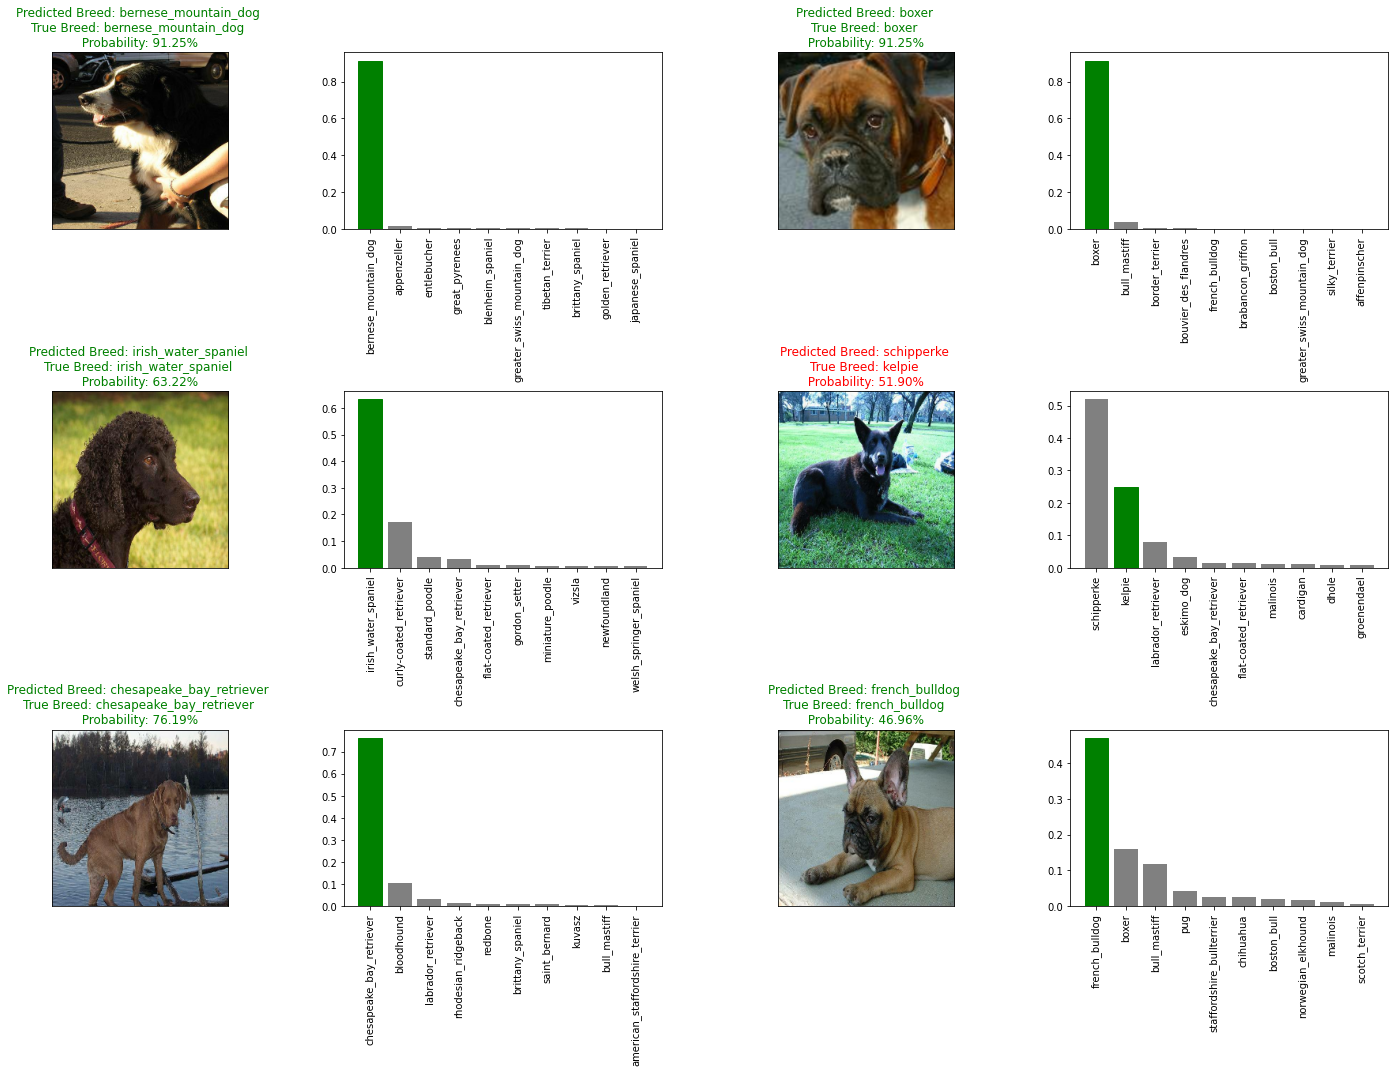

In [0]:
i_multipliers=0
n_rows=3
n_cols=2
n_images=n_cols*n_rows

plt.figure(figsize=(10*n_cols,5*n_rows))
for i in range (n_images):

  plt.subplot(n_rows, 2*n_cols,i*2+1)
  plot_pred(prediction_probabilities=perdictions,
            images=val_images, labels=val_labels,n=i+i_multipliers)
  plt.subplot(n_rows,2*n_cols,2*i+2)
  plot_pred_conf(prediction_probabilities=perdictions, labels=val_labels,n=i+i_multipliers)
plt.tight_layout(h_pad=1.0)
plt.show();

## Saving and Re-Loading the Model

In [0]:
def save_model(model, suffix=None):

  modeldir=os.path.join("drive/My Drive/Kaggle-Dog-Vision/models", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path = modeldir + "-" + suffix + ".h5"

  print(f"Saving model to :", model_path)
  model.save(model_path)
  return model_path



In [0]:
 def load_model(model_path):
   print(f"Loading saved model")
   model=tf.keras.models.load_model(model_path, custom_objects={"KerasLayer":hub.KerasLayer})
   return model

In [192]:
save_model(model=model, suffix="1000-images-mobilenet-Adam")

Saving model to : drive/My Drive/Kaggle-Dog-Vision/models/20200506-221442-1000-images-mobilenet-Adam.h5


'drive/My Drive/Kaggle-Dog-Vision/models/20200506-221442-1000-images-mobilenet-Adam.h5'

In [194]:
loaded_1000_images_model=load_model("drive/My Drive/Kaggle-Dog-Vision/models/20200506-220916-1000-images-mobilenet-Adam.h5")

Loading saved model


In [195]:
model.evaluate(val_data)

7/7 [==============================] - 1s 121ms/step - loss: 1.0984 - accuracy: 0.7200


[1.098382830619812, 0.7200000286102295]

In [196]:
loaded_1000_images_model.evaluate(val_data)

7/7 [==============================] - 1s 120ms/step - loss: 1.0984 - accuracy: 0.7200


[1.098382830619812, 0.7200000286102295]

## Train the model on full data

In [197]:
len(x), len(y)

(10222, 10222)

In [198]:
### Create batches of the full data 

full_data=create_data_batches(x,y)

Creating Batches of train data....


In [199]:
full_model=create_model()

Building the model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
full_model_tensorboard=create_tensorboard_callback()

full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=3)

In [201]:
full_model.fit(x=full_data,epochs=NUM_EPOCHS, callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 8062s 25s/step - loss: 1.3225 - accuracy: 0.6771
Epoch 2/100
320/320 [==============================] - 55s 172ms/step - loss: 0.3972 - accuracy: 0.8846
Epoch 3/100
320/320 [==============================] - 54s 169ms/step - loss: 0.2342 - accuracy: 0.9360
Epoch 4/100
320/320 [==============================] - 54s 167ms/step - loss: 0.1507 - accuracy: 0.9651
Epoch 5/100
320/320 [==============================] - 55s 173ms/step - loss: 0.1065 - accuracy: 0.9777
Epoch 6/100
320/320 [==============================] - 57s 179ms/step - loss: 0.0766 - accuracy: 0.9862
Epoch 7/100
320/320 [==============================] - 55s 173ms/step - loss: 0.0582 - accuracy: 0.9912
Epoch 8/100
320/320 [==============================] - 54s 169ms/step - loss: 0.0464 - accuracy: 0.9936
Epoch 9/100
320/320 [==============================] - 54s 169ms/step - loss: 0.0369 - accuracy: 0.9964
Epoch 10/100
320/320 [==============================] - 55s 171m

## Testing predictions on test data

In [0]:
test_path="drive/My Drive/Kaggle-Dog-Vision/test/"

In [211]:
test_filenames=[test_path +fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/Kaggle-Dog-Vision/test/ea4a775ecbf81b2cd2967cc34ce4e52b.jpg',
 'drive/My Drive/Kaggle-Dog-Vision/test/ef4b59cdb6485917a71f2c40df9c8d47.jpg',
 'drive/My Drive/Kaggle-Dog-Vision/test/f16eed64196d24c423f0a68d7ebf287d.jpg',
 'drive/My Drive/Kaggle-Dog-Vision/test/eb0f81618a71ccf82982d70879464d89.jpg',
 'drive/My Drive/Kaggle-Dog-Vision/test/f3aac2f76dfbfa4df96d63227c2c9390.jpg',
 'drive/My Drive/Kaggle-Dog-Vision/test/f5787e3574a4af6a19ff825cf0c32366.jpg',
 'drive/My Drive/Kaggle-Dog-Vision/test/e91ffd67dd303f59029d041ff4fb65b8.jpg',
 'drive/My Drive/Kaggle-Dog-Vision/test/f4db24d71e6f3100614eb4543f98394f.jpg',
 'drive/My Drive/Kaggle-Dog-Vision/test/e8319b1410a984291d71a3e60c84d86c.jpg',
 'drive/My Drive/Kaggle-Dog-Vision/test/eb9e89f5c0f1717f290360fec6f2a160.jpg']

In [212]:
test_data=create_data_batches(test_filenames,test_data=True)

Creating batches of test data...


In [213]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [206]:
## First save the full model
save_model(model=full_model,suffix="full_images_mobilenet_Adam")

Saving model to : drive/My Drive/Kaggle-Dog-Vision/models/20200507-012311-full_images_mobilenet_Adam.h5


'drive/My Drive/Kaggle-Dog-Vision/models/20200507-012311-full_images_mobilenet_Adam.h5'

In [214]:
loaded_full_model=load_model("drive/My Drive/Kaggle-Dog-Vision/models/20200507-012311-full_images_mobilenet_Adam.h5")

Loading saved model


In [215]:
### Make prediction on full model
test_predictions=loaded_full_model.predict(test_data,verbose=1)

324/324 [==============================] - 9195s 28s/step


In [216]:
test_predictions

array([[1.79608162e-06, 1.23005547e-03, 1.62111480e-08, ...,
        6.97953365e-05, 3.86809447e-08, 1.89875244e-08],
       [1.83567117e-09, 1.22392674e-09, 7.97013955e-10, ...,
        2.16934515e-09, 5.85569015e-09, 6.32938566e-07],
       [1.42523311e-11, 1.85392646e-10, 2.75590488e-11, ...,
        3.89042087e-09, 1.02380191e-07, 1.18577315e-10],
       ...,
       [5.65643802e-07, 3.39985901e-10, 1.04329327e-08, ...,
        1.19955977e-04, 3.99673263e-06, 5.45388926e-03],
       [1.66609532e-10, 4.44898091e-04, 1.70764425e-09, ...,
        1.55636770e-09, 2.86497825e-10, 2.47329908e-08],
       [1.30986795e-08, 1.27479481e-07, 1.64474534e-06, ...,
        3.30079741e-09, 5.22824848e-07, 2.25895008e-07]], dtype=float32)

In [217]:
test_predictions[:10]

array([[1.7960816e-06, 1.2300555e-03, 1.6211148e-08, ..., 6.9795336e-05,
        3.8680945e-08, 1.8987524e-08],
       [1.8356712e-09, 1.2239267e-09, 7.9701395e-10, ..., 2.1693451e-09,
        5.8556902e-09, 6.3293857e-07],
       [1.4252331e-11, 1.8539265e-10, 2.7559049e-11, ..., 3.8904209e-09,
        1.0238019e-07, 1.1857731e-10],
       ...,
       [4.5562548e-10, 2.0066428e-10, 4.7072589e-07, ..., 4.1608400e-06,
        5.7118815e-10, 5.1432680e-09],
       [5.4503340e-07, 1.0682242e-08, 1.8309745e-08, ..., 3.6779824e-07,
        1.9849319e-08, 6.5907098e-09],
       [6.5860689e-08, 1.0820182e-10, 4.9200262e-11, ..., 1.8008982e-12,
        9.0674979e-09, 4.4159798e-08]], dtype=float32)

In [218]:
test_predictions1=loaded_full_model.predict(test_data,verbose=1)

324/324 [==============================] - 61s 189ms/step


In [219]:
test_predictions.shape

(10357, 120)

In [0]:
preds_df=pd.DataFrame(columns=["id"]+list(unique_breeds))

In [231]:
preds_df

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [232]:
test_ids=[os.path.splitext(path)[0] for path in os.listdir(test_path)]
test_ids[:10]

['ea4a775ecbf81b2cd2967cc34ce4e52b',
 'ef4b59cdb6485917a71f2c40df9c8d47',
 'f16eed64196d24c423f0a68d7ebf287d',
 'eb0f81618a71ccf82982d70879464d89',
 'f3aac2f76dfbfa4df96d63227c2c9390',
 'f5787e3574a4af6a19ff825cf0c32366',
 'e91ffd67dd303f59029d041ff4fb65b8',
 'f4db24d71e6f3100614eb4543f98394f',
 'e8319b1410a984291d71a3e60c84d86c',
 'eb9e89f5c0f1717f290360fec6f2a160']

In [0]:
preds_df["id"]=test_ids

In [234]:
preds_df

id  ... yorkshire_terrier
0      ea4a775ecbf81b2cd2967cc34ce4e52b  ...               NaN
1      ef4b59cdb6485917a71f2c40df9c8d47  ...               NaN
2      f16eed64196d24c423f0a68d7ebf287d  ...               NaN
3      eb0f81618a71ccf82982d70879464d89  ...               NaN
4      f3aac2f76dfbfa4df96d63227c2c9390  ...               NaN
...                                 ...  ...               ...
10352  0536a5378c2bb64f2d458b53994f1b32  ...               NaN
10353  055cb4e6ba1540c275d6ccd2c0b52c27  ...               NaN
10354  04ed8aeed03953dac6f575148bcb21e1  ...               NaN
10355  056eca95930e26c627c11e14cd9e1b3a  ...               NaN
10356  0552e89f6c0ffaaf0de95ee3fc40d68f  ...               NaN

[10357 rows x 121 columns]

In [0]:
preds_df[list(unique_breeds)]=test_predictions

In [236]:
preds_df

id  ... yorkshire_terrier
0      ea4a775ecbf81b2cd2967cc34ce4e52b  ...       1.89875e-08
1      ef4b59cdb6485917a71f2c40df9c8d47  ...       6.32939e-07
2      f16eed64196d24c423f0a68d7ebf287d  ...       1.18577e-10
3      eb0f81618a71ccf82982d70879464d89  ...       4.04296e-06
4      f3aac2f76dfbfa4df96d63227c2c9390  ...          0.998833
...                                 ...  ...               ...
10352  0536a5378c2bb64f2d458b53994f1b32  ...       2.10576e-10
10353  055cb4e6ba1540c275d6ccd2c0b52c27  ...          0.999684
10354  04ed8aeed03953dac6f575148bcb21e1  ...        0.00545389
10355  056eca95930e26c627c11e14cd9e1b3a  ...        2.4733e-08
10356  0552e89f6c0ffaaf0de95ee3fc40d68f  ...       2.25895e-07

[10357 rows x 121 columns]

In [0]:
preds_df.to_csv("drive/My Drive/Kaggle-Dog-Vision/full_model_prediction_mobilenet.csv")